In [34]:
import pandas as pd
import sqlite3

conn= sqlite3.connect("factbook.db")
c=conn.cursor()



# Summary Statistics

In [35]:
q = "select MIN(population), MAX(population), MIN(population_growth), MAX(population_growth) from facts;"
results=c.execute(q).fetchall()

print(results)

[(0, 7256490011, 0.0, 4.02)]


# Exploring Outliers

In [36]:
# Countries with population 0:
q="SELECT name FROM facts WHERE population = 0;"

zero_pop = c.execute(q).fetchall()
print(zero_pop)

[('Antarctica',)]


In [37]:
# countrie(s) with a population of 7256490011:
q= "SELECT name FROM facts WHERE population = 7256490011;"
max_pop= c.execute(q).fetchall()

print(max_pop)

[('World',)]


1. Antartica has zero population.
2. The "facts" table contains a row for the whole world, which explains the population of over 7.2 billion

# Histograms

In [44]:
import pandas as pd
import sqlite3
%matplotlib inline

conn = sqlite3.connect('factbook.db')

data = pd.read_sql_query("SELECT population, population_growth,birth_rate, death_rate FROM facts where name !='World' and name !='Antartica';", conn )

print(data.head())


   population  population_growth  birth_rate  death_rate
0  32564342.0               2.32       38.57       13.89
1   3029278.0               0.30       12.92        6.58
2  39542166.0               1.84       23.67        4.31
3     85580.0               0.12        8.13        6.96
4  19625353.0               2.78       38.78       11.49


# 2 by 2 grid of histograms

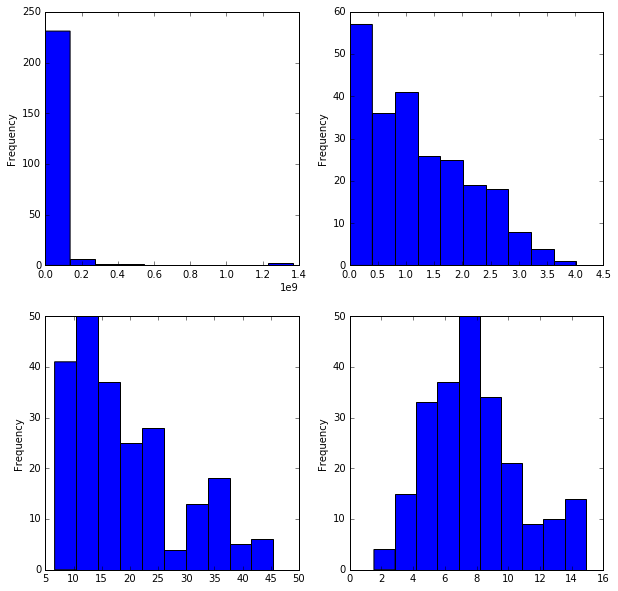

In [47]:
import matplotlib.pyplot as plt
fig =plt.figure(figsize=(10,10))
col_names =["population", "population_growth","birth_rate","death_rate"]


for i in range(1,5):
    ax = fig.add_subplot(2,2,i)
    ax= data[col_names[i-1]].plot(kind="hist")
    
plt.show()



# Population Density
Population density is the ratio of population to land area

In [71]:
q =" SELECT name, (population/area_land) as population_density FROM facts ORDER BY population_density DESC;"

results= c.execute(q).fetchall()
results=pd.DataFrame(results, columns = ["name","population_density"])

print(results.head())

         name  population_density
0       Macau             21168.0
1      Monaco             15267.0
2   Singapore              8259.0
3   Hong Kong              6655.0
4  Gaza Strip              5191.0


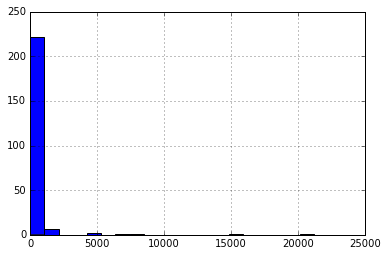

In [74]:
results["population_density"].hist(bins=20)